# Deep learning-based rock classification from core samples obtained from high-resolution drone imagery
***
### Domenico M. Crisafulli, Misael M. Morales, and Carlos Torres-Verdin
#### The University of Texas at Austin, 2024
***

## Initial Load and Visualize Data

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

from scipy.io import loadmat
from PIL import Image

In [2]:
ims = []
imkeys = []

d = loadmat('data/IMAGE 49/img_0049.mat', simplify_cells=True)

for i in range(len(d.keys())):
    k = list(d.keys())[i]
    if k.startswith('A_'):
        ims.append(d[k])
        imkeys.append(k)

ims = np.array(ims)
print(imkeys)

['A_1', 'A_10', 'A_11', 'A_12', 'A_13', 'A_14', 'A_15', 'A_16', 'A_17', 'A_18', 'A_19', 'A_2', 'A_20', 'A_21', 'A_22', 'A_23', 'A_24', 'A_25', 'A_26', 'A_27', 'A_28', 'A_29', 'A_3', 'A_30', 'A_31', 'A_32', 'A_33', 'A_34', 'A_35', 'A_36', 'A_4', 'A_5', 'A_6', 'A_7', 'A_8', 'A_9']


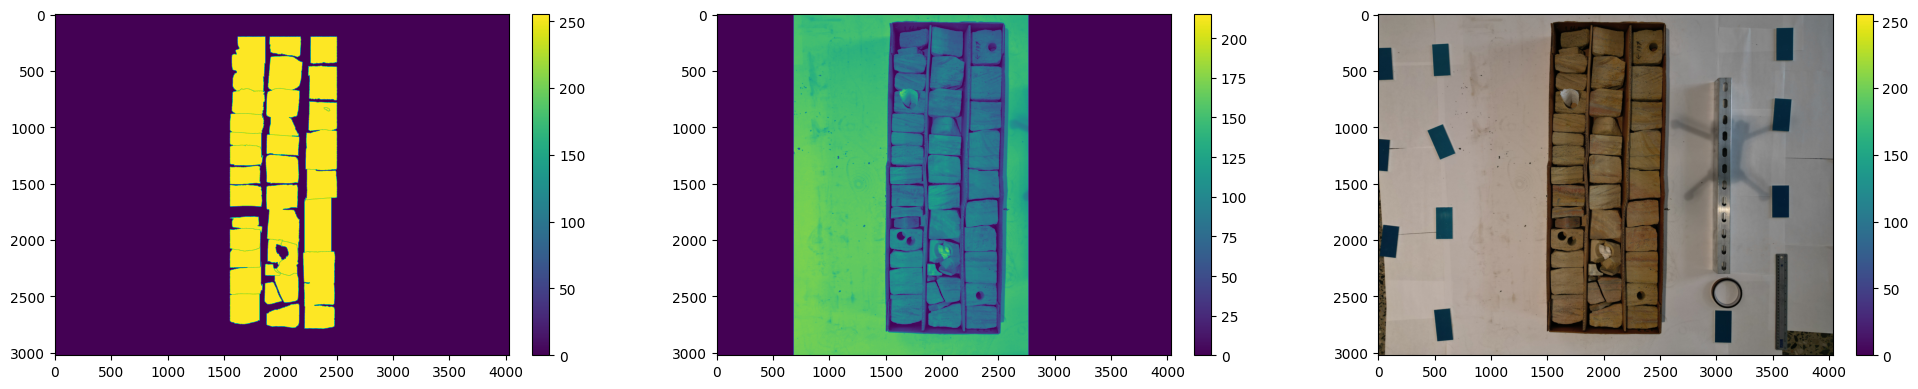

In [3]:
plt.figure(figsize=(20,4))
plt.subplot(131)
plt.imshow(d['AA'])
plt.colorbar(pad=0.04, fraction=0.046)
plt.subplot(132)
plt.imshow(d['In'])
plt.colorbar(pad=0.04, fraction=0.046)
plt.subplot(133)
plt.imshow(d['rgb'])
plt.colorbar(pad=0.04, fraction=0.046)
plt.tight_layout()
plt.show()

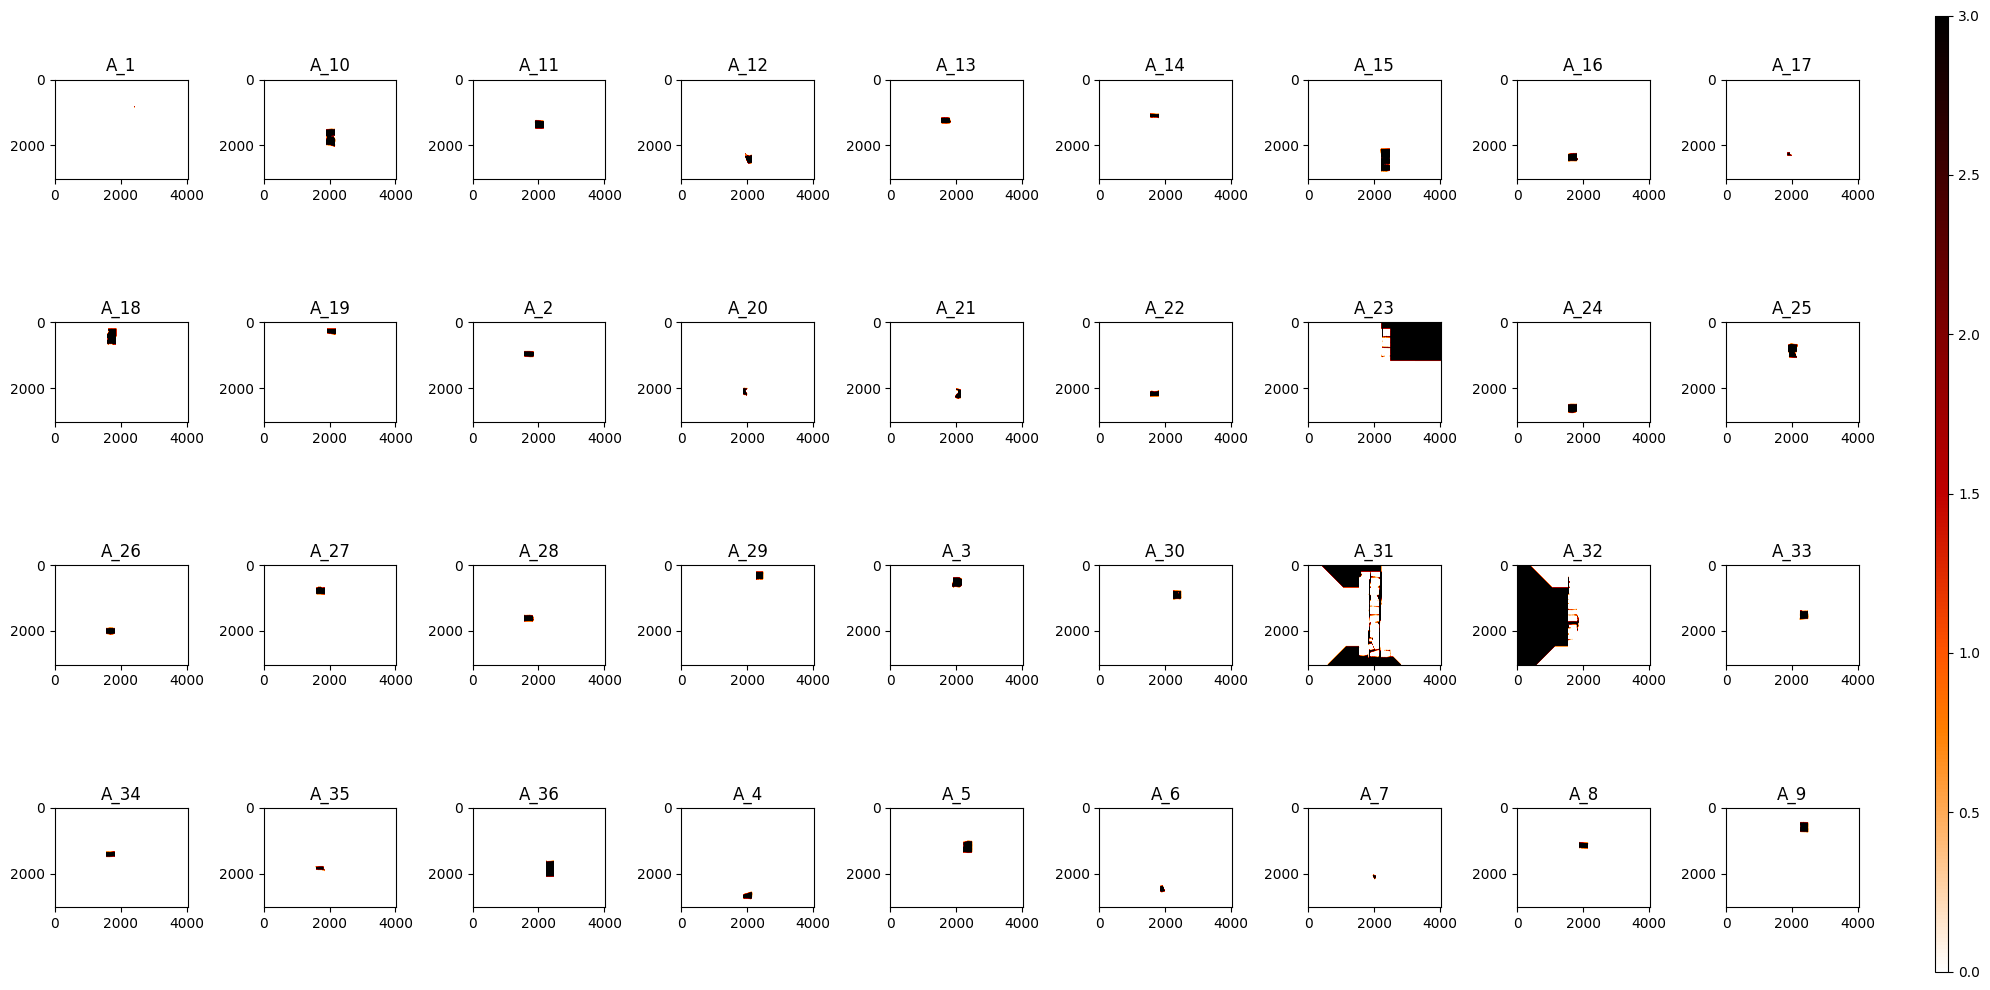

In [4]:
nrows = 4
fig = plt.figure(figsize=(20,nrows*2.5))
gs = GridSpec(nrows, ims.shape[0]//nrows+1, figure=fig, width_ratios=([1]*(ims.shape[0]//nrows))+[0.1])
cax = fig.add_subplot(gs[:, -1])

k = 0
for i in range(nrows):
    for j in range(ims.shape[0]//nrows):
        ax = fig.add_subplot(gs[i, j])
        im = ax.imshow(ims[k], cmap='gist_heat_r')
        ax.set(title=imkeys[k])
        k += 1
cb = plt.colorbar(im, cax=cax)

plt.tight_layout()
plt.show()

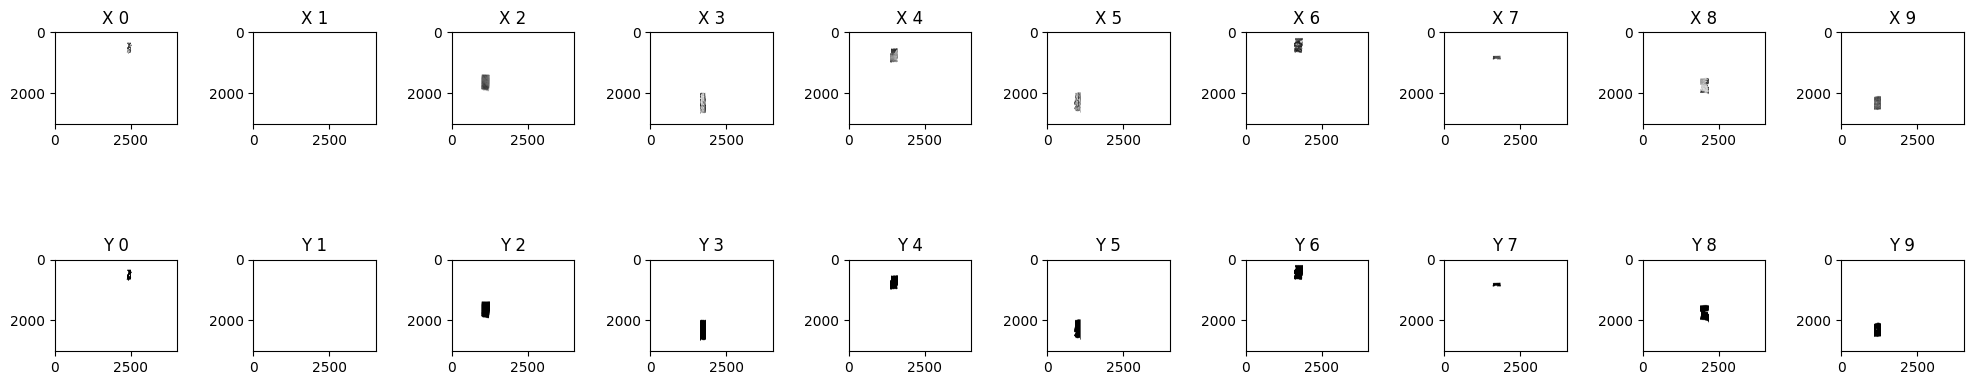

In [5]:
idx = np.random.choice(range(618), size=10, replace=False)

fig, axs = plt.subplots(2, 10, figsize=(20,5))
for j in range(10):
    for i in range(2):
        x = np.load('data/x_images/img_{}.npy'.format(idx[j]))
        y = np.load('data/y_images/img_{}.npy'.format(idx[j]))
        axs[0,j].imshow(x, cmap='binary')
        axs[1,j].imshow(y, cmap='binary')
        axs[0,j].set(title='X {}'.format(j))
        axs[1,j].set(title='Y {}'.format(j))
plt.tight_layout()
plt.show()

***
## To JPG images

In [ ]:
nimgs = len(os.listdir('data/x_images'))

for i in tqdm(range(nimgs), desc='Converting images', unit='image(s)'):
    arr = np.expand_dims(np.load('data/x_images/img_{}.npy'.format(i)), 0)
    img = Image.fromarray(arr)
    img.save('data/x_images_jpg/img_{}.jpg'.format(i))

***
# END